In [1]:
#产生数据集

import sys
import os
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import operator

#配置UTF8输出环境
reload(sys)
sys.setdefaultencoding('utf-8')
#

k = 3 #最近邻个数

def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

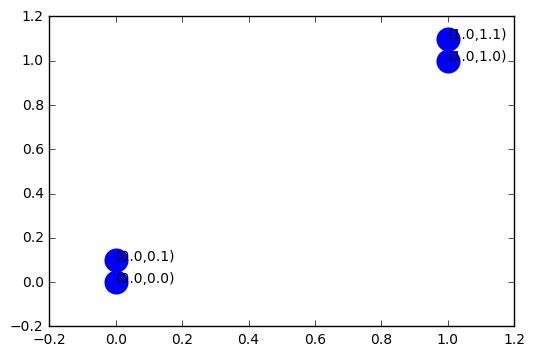

In [2]:
#绘制图形

dataSet, labels = createDataSet()
#绘图

fig = plt.figure()
ax = fig.add_subplot(111)
indx = 0
for point in dataSet:
    if labels[indx] == 'A':
        ax.scatter(point[0], point[1], c = 'blue', marker = 'o', linewidths = 0, s = 300)
        plt.annotate("(" + str(point[0]) + "," + str(point[1]) + ")", xy = (point[0], point[1]))
    else:
        ax.scatter(point[0], point[1], c = 'red', marker = '^', linewidths = 0, s = 300)
        plt.annotate("(" + str(point[0]) + "," + str(point[1]) + ")", xy = (point[0], point[1]))
        
plt.show()

In [4]:
#夹角余弦距离公式

def cosdist(vector1, vector2):
    return dot(vector1, vector2) / (linalg.norm(vector1)*linalg.norm(vector2))

In [5]:
#kNN分类器
#测试集：testdata; 训练集: trainSet; 类别标签: listClasses;

def classify(testdata, trainSet, listClasses, k):
    dataSetSize = trainSet.shape(0)     #返回样本集的行数
    distances = array(zeros(dataSetSize))
    for indx in xrange(dataSetSize):    #计算测试集与训练集之间的距离； 夹角余弦
        distances[indx] = cosdist(testdata, trainSet[indx])
    #根据生成的夹角余弦按从大到小排序，结果为索引号
    
    sortedDistIndicies = argsort(-distances)
    classCount = {}
    
    for i in range(k): #获取角度最小的前k项作为参考项
        #按排序顺序返回样本集对应的类别标签
        voteIlabel = listClasses[sortedDistIndicies[i]]
        #为字典classcount赋值，相同key，value+1
        classcount[voteIlabel] = classcount.get(voteIlabel, 0) + 1
    
    #对分类字典classcount按value重新排序
    sortedClassCount = sorted(classcount.iteritems(), key=operator.itemgetter(1), reverse = true)
    
    return sortedClassCount[0][0] #返回序最高的一项


In [7]:
'''
dataSet, listClasses = loadDataSet()
nb = NBayes()
nb.train_set(dataSet, listClasses)
#使用之前贝叶斯分类阶段的数据集及生成的TF向量进行分类

print classify(nb.tf[3], nb.tf, listClasses, k)
'''

'\ndataSet, listClasses = loadDataSet()\nnb = NBayes()\nnb.train_set(dataSet, listClasses)\n#\xe4\xbd\xbf\xe7\x94\xa8\xe4\xb9\x8b\xe5\x89\x8d\xe8\xb4\x9d\xe5\x8f\xb6\xe6\x96\xaf\xe5\x88\x86\xe7\xb1\xbb\xe9\x98\xb6\xe6\xae\xb5\xe7\x9a\x84\xe6\x95\xb0\xe6\x8d\xae\xe9\x9b\x86\xe5\x8f\x8a\xe7\x94\x9f\xe6\x88\x90\xe7\x9a\x84TF\xe5\x90\x91\xe9\x87\x8f\xe8\xbf\x9b\xe8\xa1\x8c\xe5\x88\x86\xe7\xb1\xbb\n\nprint classify(nb.tf[3], nb.tf, listClasses, k)\n'